<b><h1>SEM5 CS4<h1><b>
<h2><b>18BCS6212<b><h2>
<h3><b>Pract-7&8<b><h3>

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Validation_Set.csv to Validation_Set (2).csv
Saving Training_Set.csv to Training_Set (2).csv


In [5]:
import io 
  
train = pd.read_csv(io.BytesIO(uploaded['Training_Set.csv'])) 

In [6]:
train.shape

(30, 3)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute 1 (a1)  30 non-null     int64
 1   Attribute 2 (a2)  30 non-null     int64
 2   Class Label       30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [8]:
train.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [9]:
train.isnull().mean().round()*100

Attribute 1 (a1)    0.0
Attribute 2 (a2)    0.0
Class Label         0.0
dtype: float64

There are no missing values in our dataset.

In [10]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [11]:
# Putting feature variable to X
X_train = train.drop('Class Label',axis=1)

# Putting response variable to y
y_train = train['Class Label']

In [12]:
#Importing validation data set for testing the model.
test = pd.read_csv(io.BytesIO(uploaded['Validation_Set.csv'])) 

In [13]:
test.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [14]:
# Putting feature variable to X
X_test = test.iloc[:,:2]

# Putting response variable to y
y_test = test['True Class Label']

In [15]:
X_test.head()

,Attribute 1 (a1),Attribute 2 (a2)
0,2,35
1,12,13
2,-4,45
3,2,17


<h2><b>Model 1<b><h2>

In [16]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

M1 = DecisionTreeClassifier(max_depth=20)
M1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Predictions
y_pred_default = M1.predict(X_test)

#Report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [18]:
# Confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[1 0]
 [2 1]]
0.5


**<h2>Decision Tree<h2>**

In [19]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(train.columns[1:])
features


['Attribute 2 (a2)', 'Class Label']

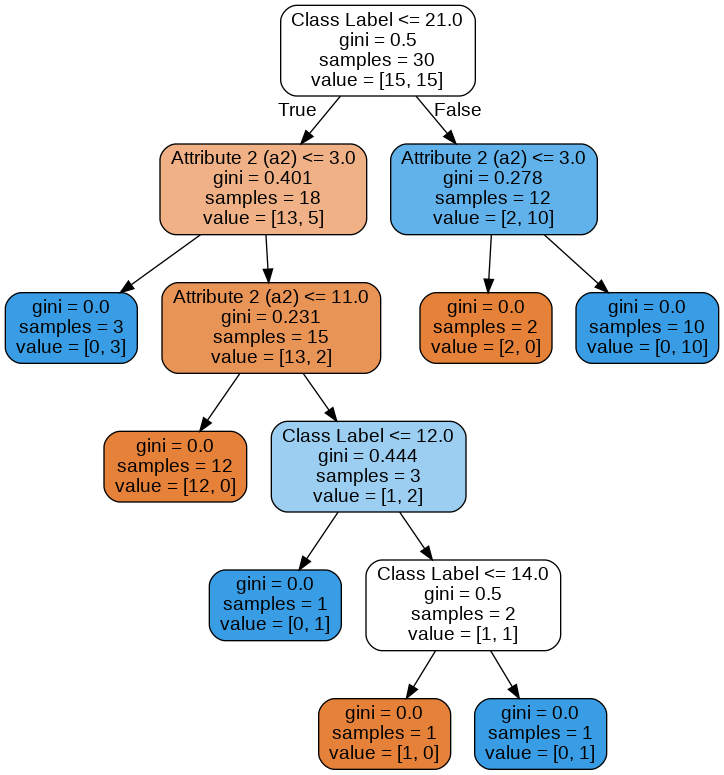

In [20]:
# plotting tree with max_depth=20
dot_data = StringIO()  
export_graphviz(M1, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
from sklearn.model_selection import GridSearchCV, KFold

In [22]:
# Hyper Parameter Tuning.
param = { 'criterion' : ['gini'], 'max_depth': range(1,21,2), 'min_samples_leaf' : range(1,6), 'min_samples_split' : range(1,11)}

In [23]:
fold = KFold(n_splits = 5, shuffle = True, random_state = 10)

<h2><b>Model 2<b><h2>

In [24]:
M2 = DecisionTreeClassifier()
grid_model = GridSearchCV(estimator = M2, param_grid= param, cv = fold, verbose = 1, return_train_score = True, n_jobs = -1)

In [25]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    8.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [26]:
result = pd.DataFrame(grid_model.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002519,0.000369,0.000000,0.000000,gini,1,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003337,0.001019,0.001398,0.000060,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333
2,0.002189,0.000109,0.002498,0.002486,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333
3,0.002506,0.000459,0.001283,0.000079,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333
4,0.004758,0.003251,0.001378,0.000120,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333


In [27]:

best_score = grid_model.best_score_
best_hyper = grid_model.best_params_

In [28]:
print("score : {} \n params : {}".format(best_score,best_hyper))

score : 0.9333333333333333 
 params : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [29]:
#model with optimal hyperparameter
optimal_model = DecisionTreeClassifier(criterion='gini',
                                       random_state = 100 , 
                                       max_depth= 3,
                                       min_samples_leaf=1,
                                       min_samples_split=2)

optimal_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [30]:
#SCORE of our model on test data.
optimal_model.score(X_test,y_test)

0.75

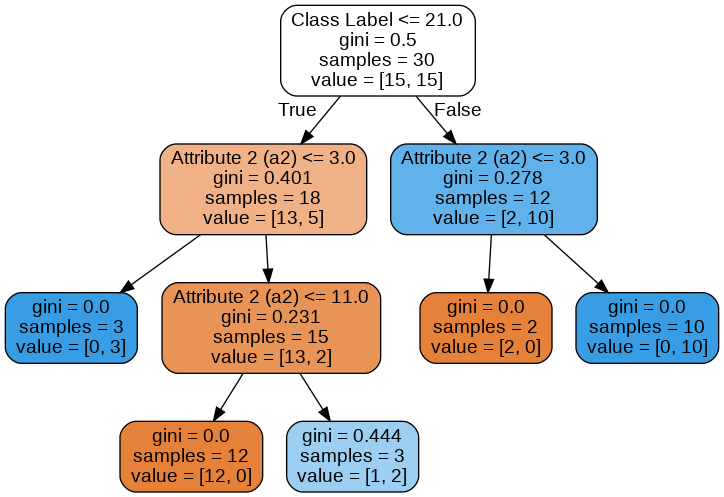

In [31]:
dot_data = StringIO()  
export_graphviz(optimal_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
y_pred = optimal_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [33]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1 0]
 [1 2]]
0.75


<h3><b>For Quiz Purpose<b><h3>

In [34]:
#model with optimal hyperparameter
quiz_model = DecisionTreeClassifier(criterion='gini',
                                       random_state = 100 , 
                                       max_depth= 20,
                                       min_samples_leaf=5,
                                       min_samples_split=10)

quiz_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

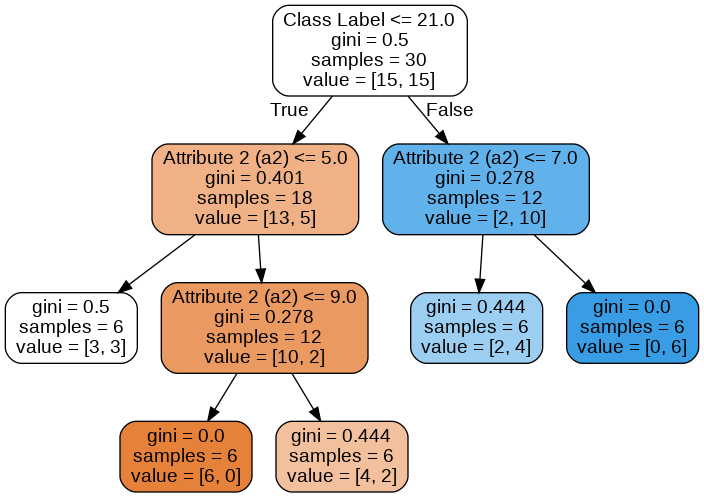

In [35]:
dot_data = StringIO()  
export_graphviz(quiz_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())